In [ ]:
import pandas as pd
import numpy as np
import os
import warnings

from sklearn.impute import SimpleImputer

warnings.filterwarnings('ignore')

import joblib

from utils import train_random_forest, train_stacker,train_xgboost, cap_outliers

In [2]:
prefecture_code = pd.read_csv("japan_housing_data/prefecture_code.csv")
prefecture_code.head()

,Code,JpName,EnName
0,1,北海道,Hokkaido
1,2,青森県,Aomori
2,3,岩手県,Iwate
3,4,宮城県,Miyagi
4,5,秋田県,Akita


In [3]:
df = pd.DataFrame()

data_dir = "japan_housing_data/trade_prices"

for f in os.listdir(data_dir):
    df_prefecture = pd.read_csv(os.path.join(data_dir, f), low_memory=False)
    df_prefecture["Code"] = int(f.split(".")[0])
    df = pd.concat([df, df_prefecture])

df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,Breadth,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,4.0,Category I Exclusively Low-story Residential Zone,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,4.0,Urbanization Control Area,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,4.0,Urbanization Control Area,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,35.0,Urbanization Control Area,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,Urbanization Control Area,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40


In [4]:
df = pd.merge(left=df, right=prefecture_code, left_on="Code", right_on="Code", how="left")
df.head()

,No,Type,Region,MunicipalityCode,Prefecture,Municipality,DistrictName,NearestStation,TimeToNearestStation,MinTimeToNearestStation,...,CoverageRatio,FloorAreaRatio,Period,Year,Quarter,Renovation,Remarks,Code,JpName,EnName
0,1,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Aobadai,Moji,30-60minutes,30.0,...,50.0,80.0,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
1,2,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Komorie,30-60minutes,30.0,...,NaN,NaN,1st quarter 2018,2018,1,NaN,NaN,40,福岡県,Fukuoka
2,3,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,NaN,NaN,4th quarter 2017,2017,4,NaN,NaN,40,福岡県,Fukuoka
3,4,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,4th quarter 2016,2016,4,NaN,NaN,40,福岡県,Fukuoka
4,5,Residential Land(Land Only),Residential Area,40101,Fukuoka Prefecture,"Moji Ward,Kitakyushu City",Oaza Ikawa,Moji,1H-1H30,60.0,...,70.0,200.0,3rd quarter 2016,2016,3,NaN,NaN,40,福岡県,Fukuoka


In [5]:
df.columns

Index(['No', 'Type', 'Region', 'MunicipalityCode', 'Prefecture',
       'Municipality', 'DistrictName', 'NearestStation',
       'TimeToNearestStation', 'MinTimeToNearestStation',
       'MaxTimeToNearestStation', 'TradePrice', 'FloorPlan', 'Area',
       'AreaIsGreaterFlag', 'UnitPrice', 'PricePerTsubo', 'LandShape',
       'Frontage', 'FrontageIsGreaterFlag', 'TotalFloorArea',
       'TotalFloorAreaIsGreaterFlag', 'BuildingYear', 'PrewarBuilding',
       'Structure', 'Use', 'Purpose', 'Direction', 'Classification', 'Breadth',
       'CityPlanning', 'CoverageRatio', 'FloorAreaRatio', 'Period', 'Year',
       'Quarter', 'Renovation', 'Remarks', 'Code', 'JpName', 'EnName'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3906518 entries, 0 to 3906517
Data columns (total 41 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   No                           int64  
 1   Type                         object 
 2   Region                       object 
 3   MunicipalityCode             int64  
 4   Prefecture                   object 
 5   Municipality                 object 
 6   DistrictName                 object 
 7   NearestStation               object 
 8   TimeToNearestStation         object 
 9   MinTimeToNearestStation      float64
 10  MaxTimeToNearestStation      float64
 11  TradePrice                   int64  
 12  FloorPlan                    object 
 13  Area                         int64  
 14  AreaIsGreaterFlag            int64  
 15  UnitPrice                    float64
 16  PricePerTsubo                float64
 17  LandShape                    object 
 18  Frontage                     float64
 19  

In [7]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))  

,No,MunicipalityCode,MinTimeToNearestStation,MaxTimeToNearestStation,TradePrice,Area,AreaIsGreaterFlag,UnitPrice,PricePerTsubo,Frontage,TotalFloorArea,TotalFloorAreaIsGreaterFlag,BuildingYear,PrewarBuilding,Breadth,CoverageRatio,FloorAreaRatio,Year,Quarter,Code
count,3906518.0,3906518.0,3315977.0,3228071.0,3906518.0,3906518.0,3906518.0,1384415.0,1384415.0,2537063.0,1317660.0,3906518.0,1869804.0,3906518.0,2685837.0,3191877.0,3191877.0,3906518.0,3906518.0,3906518.0
mean,78354.1,20467.1,22.6,27.4,27605894.6,467.4,0.0,85148.9,281406.5,14.6,175.2,0.0,1995.5,0.0,6.8,61.0,209.0,2012.9,2.5,20.3
std,80173.6,12175.5,23.1,27.7,141745961.4,847.7,0.2,168683.2,557031.6,9.8,256.4,0.1,15.2,0.0,4.6,10.0,107.5,3.7,1.1,12.2
min,1.0,1101.0,0.0,0.0,100.0,10.0,0.0,1.0,2.0,0.1,10.0,0.0,1945.0,0.0,1.0,30.0,50.0,2005.0,1.0,1.0
25%,20780.0,12204.0,9.0,8.0,5000000.0,100.0,0.0,16000.0,55000.0,8.5,95.0,0.0,1984.0,0.0,4.0,60.0,200.0,2010.0,2.0,12.0
50%,48159.0,17210.0,16.0,15.0,14000000.0,185.0,0.0,40000.0,130000.0,12.0,105.0,0.0,1996.0,0.0,6.0,60.0,200.0,2013.0,3.0,17.0
75%,114733.0,28110.0,30.0,29.0,29000000.0,370.0,0.0,91000.0,300000.0,17.0,140.0,0.0,2009.0,0.0,7.0,60.0,200.0,2016.0,4.0,28.0
max,406575.0,47382.0,120.0,120.0,61000000000.0,5000.0,1.0,20000000.0,66000000.0,50.0,2000.0,1.0,2020.0,1.0,99.9,80.0,1300.0,2019.0,4.0,47.0


In [8]:
df['EnName'] = df['EnName'].apply(lambda x: x.rstrip())

In [9]:
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("Missing percentage\n")
print(missing_percentage)

Missing percentage

Remarks                        94.064791
Renovation                     85.578052
FloorPlan                      84.713497
Purpose                        69.722960
TotalFloorArea                 66.270218
PricePerTsubo                  64.561407
UnitPrice                      64.561407
BuildingYear                   52.136301
Use                            51.709579
Structure                      51.041490
Frontage                       35.055643
Breadth                        31.247290
Classification                 30.514719
Direction                      28.901646
LandShape                      28.862788
Region                         28.595209
FloorAreaRatio                 18.293555
CoverageRatio                  18.293555
MaxTimeToNearestStation        17.367052
MinTimeToNearestStation        15.116812
TimeToNearestStation           15.116812
NearestStation                 14.483768
CityPlanning                   13.584118
DistrictName                    0.211

In [10]:
df['MunicipalityCode'] = df['MunicipalityCode'].astype(str)

In [11]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna('unkown', inplace=True)

In [12]:
df_copy = df.copy()

In [24]:
random_forest_dict = {}
xgboost_dict = {}
stacking_dict = {}

In [25]:
prefectures = df['EnName'].unique()
print(prefectures)

['Fukuoka' 'Saga' 'Kumamoto' 'Nagasaki' 'Kagoshima' 'Okinawa' 'Miyazaki'
 'Oita' 'Kagawa' 'Aichi' 'Shizuoka' 'Tokushima' 'Ibaraki' 'Nagano'
 'Hiroshima' 'Yamaguchi' 'Gifu' 'Tochigi' 'Shiga' 'Tottori' 'Yamanashi'
 'Fukui' 'Wakayama' 'Mie' 'Shimane' 'Kyoto' 'Osaka' 'Okayama' 'Toyama'
 'Aomori' 'Iwate' 'Ishikawa' 'Nara' 'Hokkaido' 'Niigata' 'Kanagawa'
 'Hyogo' 'Miyagi' 'Gunma' 'Ehime' 'Kochi' 'Saitama' 'Akita' 'Tokyo'
 'Fukushima' 'Yamagata' 'Chiba']


In [ ]:
os.makedirs("models", exist_ok=True)

for prefecture in prefectures:
    print(f"Processing {prefecture}")
    prefecture_df = df[df['EnName'] == prefecture].copy()
    prefecture_df = prefecture_df.sort_values(by=['Year', 'Quarter'])
    
    split_index = int(len(prefecture_df) * 0.85)
    train_df = prefecture_df.iloc[:split_index]
    test_df = prefecture_df.iloc[split_index:]

    columns_to_cap = ["Area", "TotalFloorArea","FloorAreaRatio"]
    for col in columns_to_cap:    
        train_df[col] = cap_outliers(train_df[col])
    
    
    columns_to_drop = ['JpName', 'DistrictName', 'UnitPrice','PricePerTsubo', 'No', 
                   'TimeToNearestStation', 'TotalFloorAreaIsGreaterFlag', 'NearestStation', 
                   'Period', 'Year', 'Municipality', 'EnName', 'Prefecture', 
                   'AreaIsGreaterFlag', 'Quarter', 'FrontageIsGreaterFlag'
                   ]
    train_df = train_df.drop(columns= columns_to_drop)
    test_df = test_df.drop(columns= columns_to_drop)
    
    
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

    numerical_columns = train_df.select_dtypes(include=['number']).columns
    train_df_mean = train_df.copy()
    test_df_mean = test_df.copy()
    train_df_mean[numerical_columns] = imp_mean.fit_transform(train_df_mean[numerical_columns])
    test_df_mean[numerical_columns] = imp_mean.transform(test_df_mean[numerical_columns])

    X_train = train_df_mean.drop(columns=["TradePrice"])
    y_train = train_df_mean["TradePrice"]
    X_test = test_df_mean.drop(columns=["TradePrice"])
    y_test = test_df_mean["TradePrice"]
    
        
    rf_result = train_random_forest(X_train.copy(), y_train, X_test.copy(), y_test)
    random_forest_dict[prefecture] = rf_result
    joblib.dump(rf_result['model'], f"models/random_forest_{prefecture}.pkl")
    
    
    xgb_result = train_xgboost(X_train.copy(), y_train, X_test.copy(), y_test)
    xgboost_dict[prefecture] = xgb_result
    joblib.dump(xgb_result['model'], f"models/xgboost_{prefecture}.pkl")
    
    
    stacker_result = train_stacker(X_train.copy(), y_train, X_test.copy(), y_test, rf_result['top_12_features'])
    stacking_dict[prefecture] = stacker_result
    joblib.dump(stacker_result['model'], f"models/stacking_{prefecture}.pkl")
    
    print(f"Completed {prefecture}")

Processing Fukuoka
Random Forest R-squared: 0.3738
XGB Regressor R-squared: 0.4047
Stacking Regressor R-squared: 0.3847
Completed Fukuoka
Processing Saga
Random Forest R-squared: -1.2631
XGB Regressor R-squared: -1.2050
Stacking Regressor R-squared: -1.4279
Completed Saga
Processing Kumamoto
Random Forest R-squared: 0.2191
XGB Regressor R-squared: 0.4768
Stacking Regressor R-squared: 0.2594
Completed Kumamoto
Processing Nagasaki
Random Forest R-squared: 0.4754
XGB Regressor R-squared: 0.4528
Stacking Regressor R-squared: 0.3887
Completed Nagasaki
Processing Kagoshima
Random Forest R-squared: 0.0041
XGB Regressor R-squared: 0.6911
Stacking Regressor R-squared: 0.5268
Completed Kagoshima
Processing Okinawa
Random Forest R-squared: 0.4979
XGB Regressor R-squared: 0.4884
Stacking Regressor R-squared: 0.3581
Completed Okinawa
Processing Miyazaki
Random Forest R-squared: 0.2293
XGB Regressor R-squared: 0.4430
Stacking Regressor R-squared: 0.3799
Completed Miyazaki
Processing Oita
Random Fore

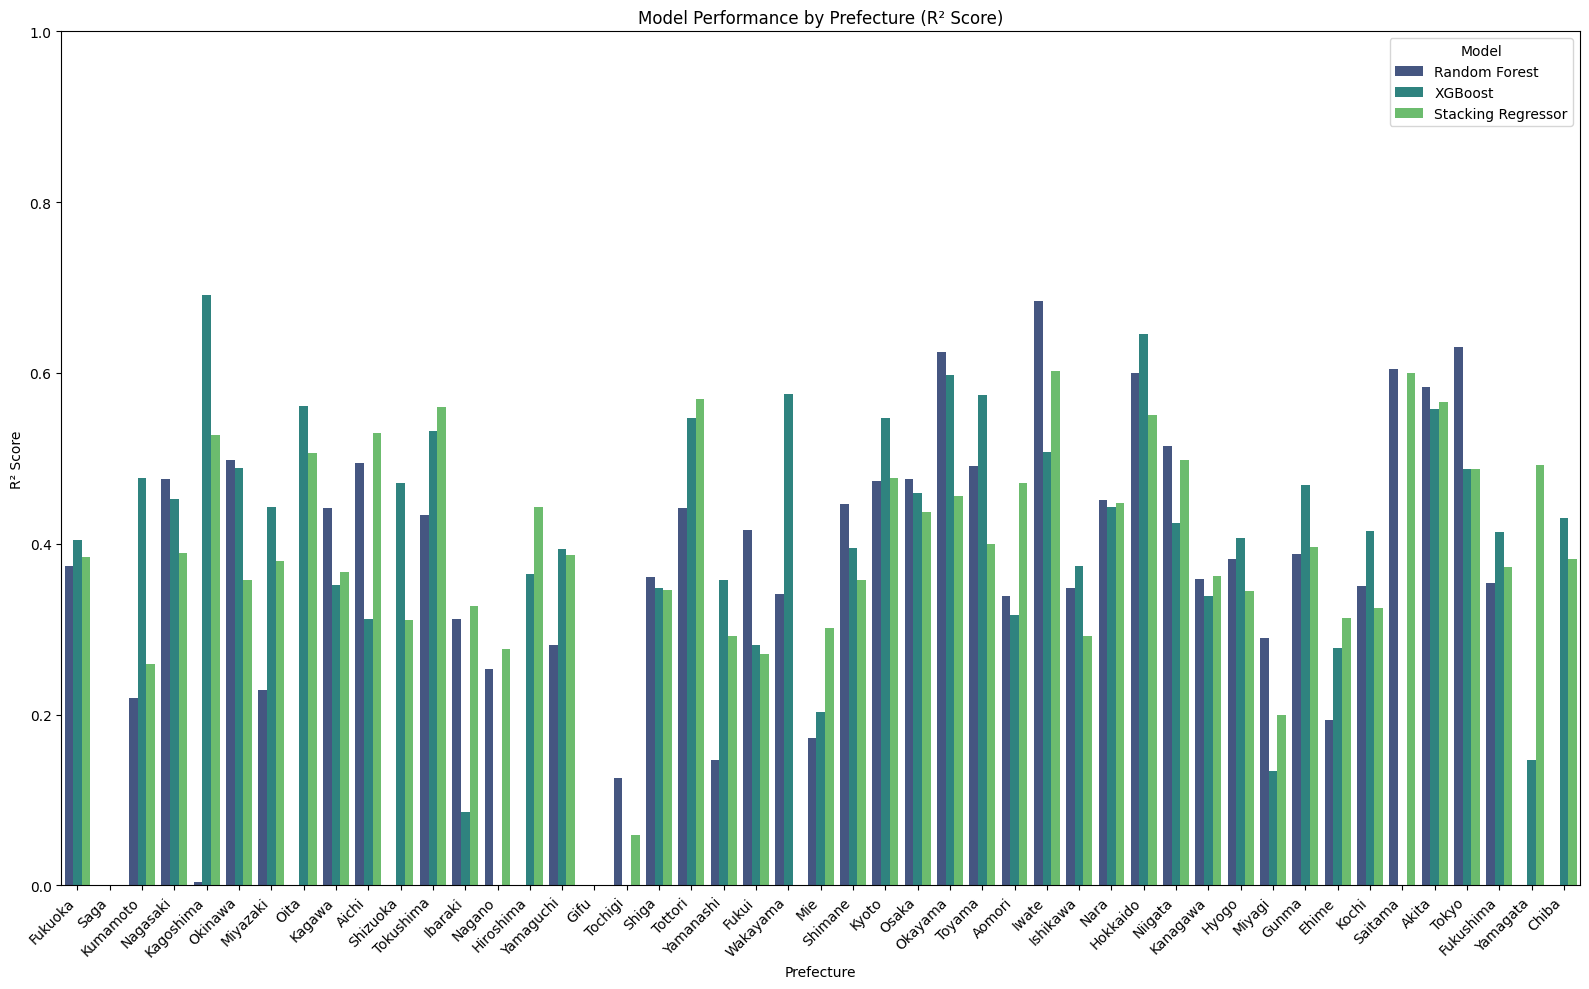

In [ ]:
plot_scores(random_forest_dict, xgboost_dict, stacking_dict)